In [ ]:
### CS6301 - MACHINE LEARNING LAB
### 22.02.24
### Ragul N (2021503542)

In [ ]:
##  QN 1. Perceptron learning algorithm with gradient descent to classify a random sample of 50 data points.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_3542, y_3542 = make_blobs(n_samples=50, n_features=2, centers=2, random_state=0)
X_3542 = StandardScaler().fit_transform(X_3542)
print('The dimension of the target variable before reshaping: ',y_3542.ndim)
y_3542 = y_3542[:, np.newaxis]
# print('The generated dataset:')
#print(X)
# print(y)
print('The dimension of the target variable after reshaping: ',y_3542.ndim)

The dimension of the target variable before reshaping:  1
The dimension of the target variable after reshaping:  2


In [ ]:
def compute_loss_3542(X_3542, y_3542, w):

    x1 = np.hstack((np.ones((X_3542.shape[0], 1)), X_3542))
    #x -> 2 columns corresponding 2 features
    #w -> 3 columns two weights and one bias term
    #So add an extra column with value 1 denoting the bias term

    ypred = np.dot(x1, w)

    # Mean squared error loss
    loss = 0.5*np.sum((y_3542- ypred) ** 2)

    return loss

In [ ]:
def computeMistakes_3542(X, y, w):
    x1 = np.hstack((np.ones([X.shape[0], 1]), X))
    ypred = np.dot(x1, w)
    ypred1 = np.zeros(ypred.shape)
    #This line is crucial, it scans the entire ypred and if it is lesser than 0, it is 0, if it is greater than 1 then 1
    ypred1[ypred > 0] = 1
    ypred1[ypred <= 0] = 0
    num_mistakes = len(np.where(ypred1 != y)[0])
    return num_mistakes

In [ ]:
def compute_gradient_3542(X, y, w):
    x1 = np.hstack([np.ones([X.shape[0], 1]), X])
    y_pred = np.dot(x1, w)
    grad = np.zeros(w.shape)
    for j in range(len(grad)):
        grad[j] = -np.dot((y - y_pred).transpose(), x1[:, j:j+1])
    return grad

In [ ]:
def plot_boundary_3542(X, y, w,ax):
    # Create a meshgrid of points to evaluate the decision boundary
    h = 0.2  # Step size in the mesh
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    # Flatten the meshgrid points and add a column of ones for bias
    x_mesh = np.c_[np.ones(len(x1.ravel())), x1.ravel(), x2.ravel()]

    # Compute the predicted labels for the meshgrid points
    y_pred = np.sign(np.dot(x_mesh, w))
    y_pred = y_pred.reshape(x1.shape)

    # Plot the decision boundary
    ax.contourf(x1, x2, y_pred, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')



In [ ]:
learning_rate=0.001
w0=np.array([-1,1,-1])
print(w0.shape)
w0=w0[:,np.newaxis]
print(w0.shape)
w=w0
losses=[]
mistakes=[]
epochs=30

(3,)
(3, 1)


<ipython-input-30-3d034695031f>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12, 42))


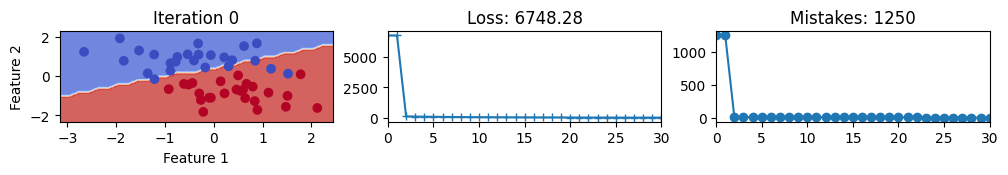

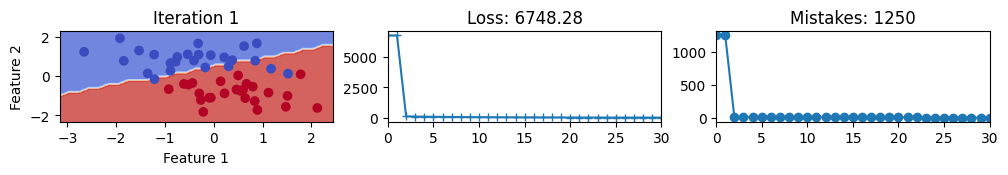

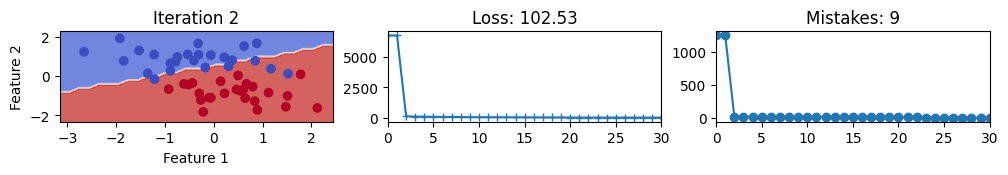

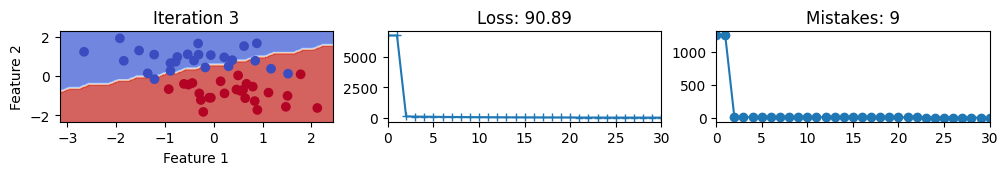

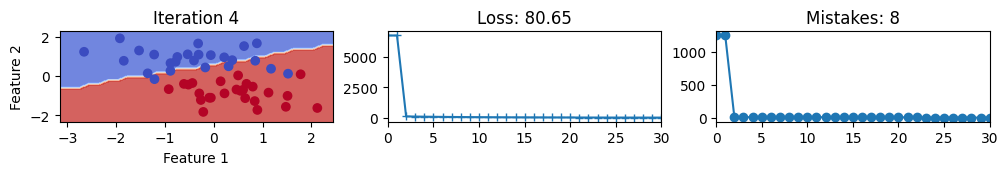

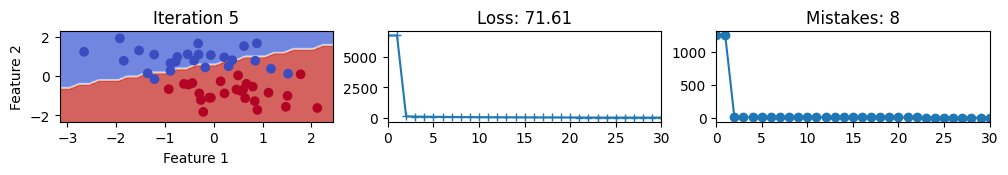

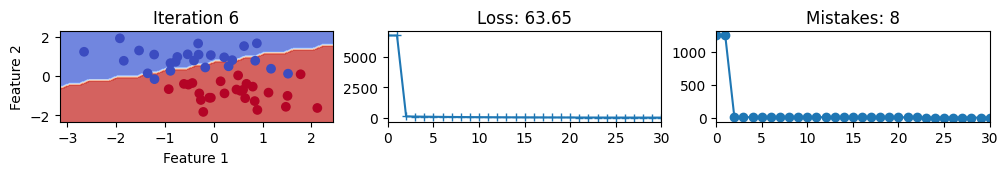

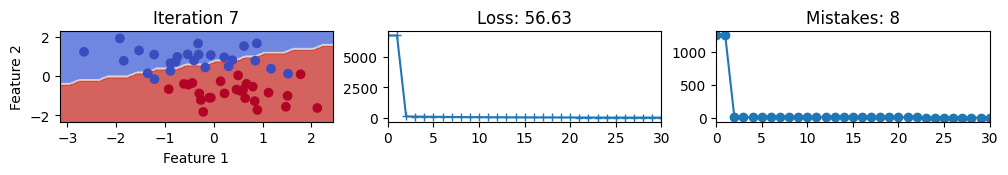

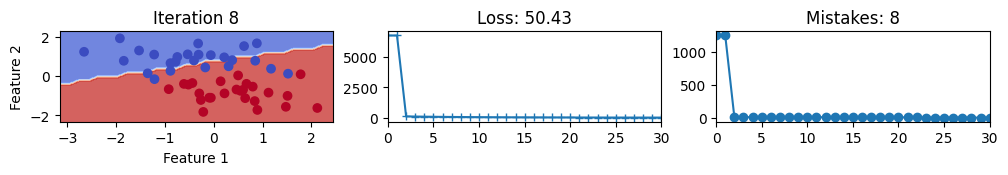

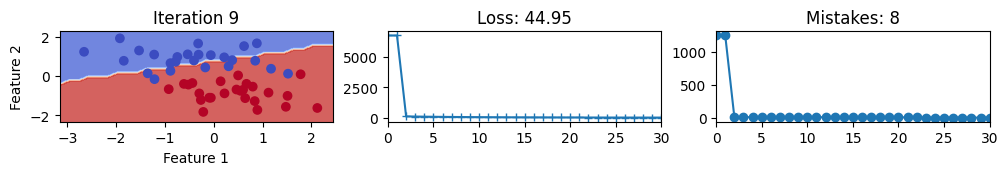

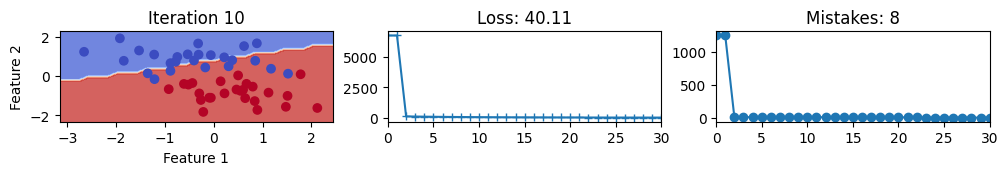

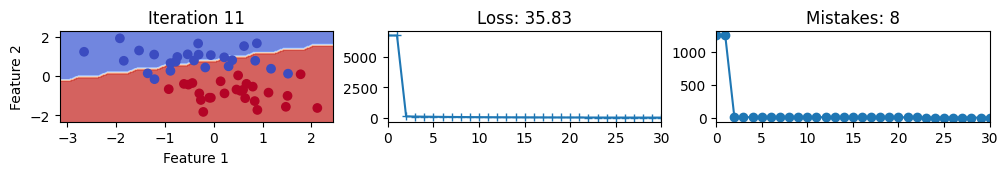

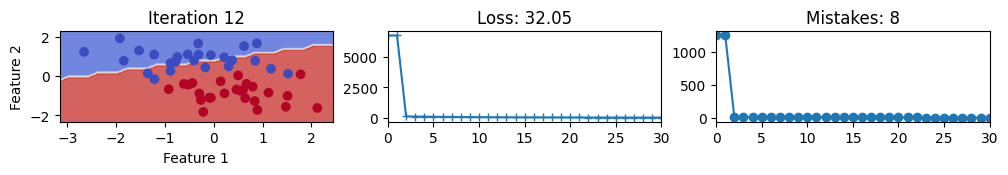

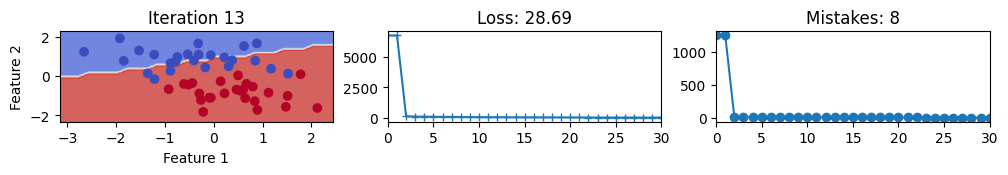

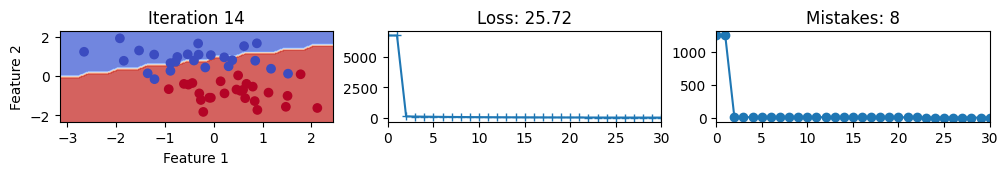

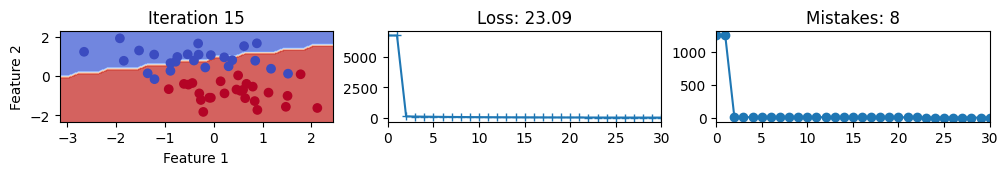

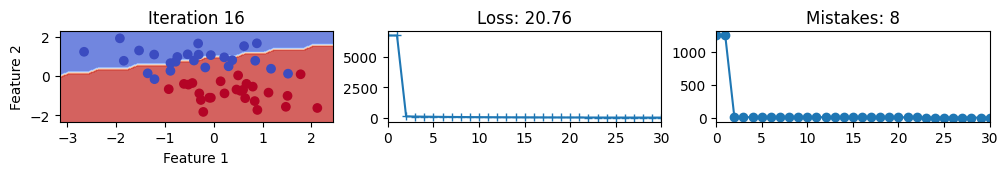

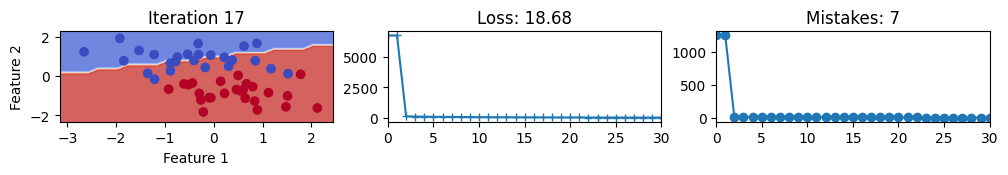

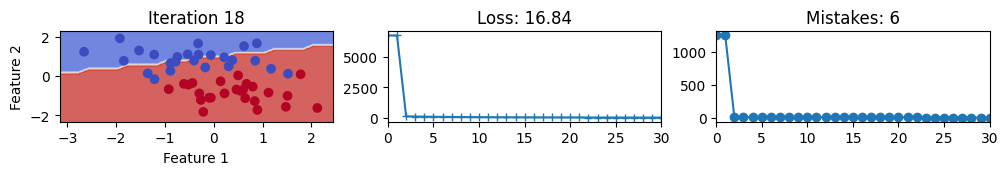

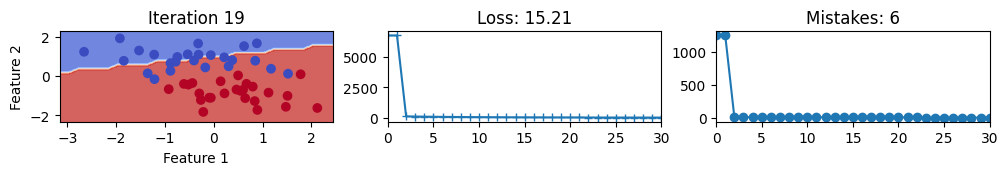

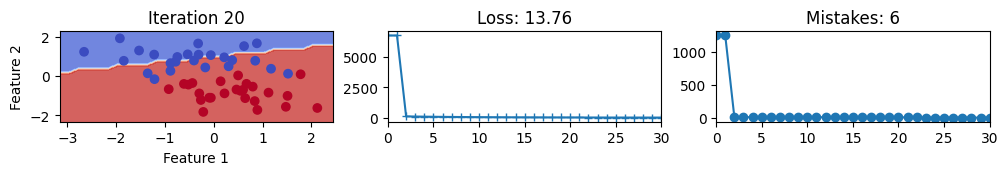

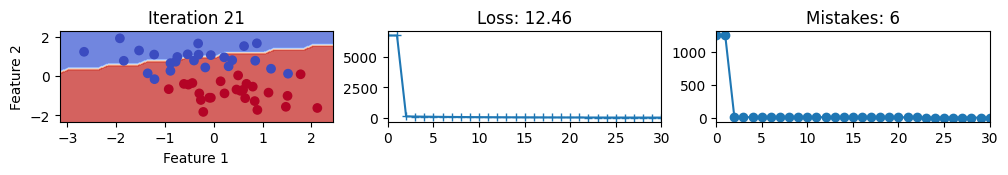

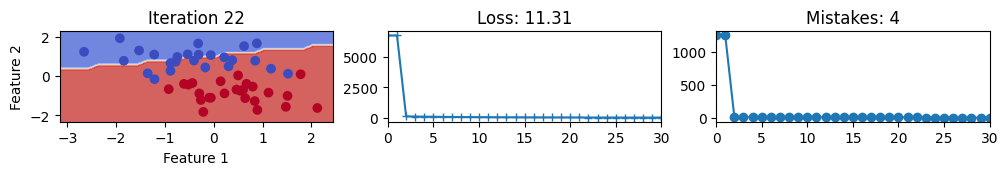

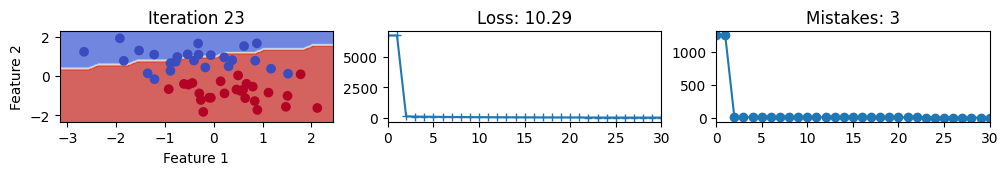

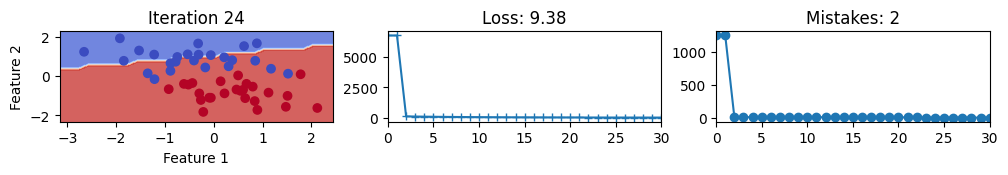

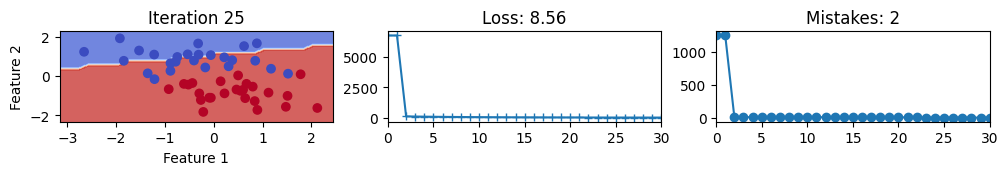

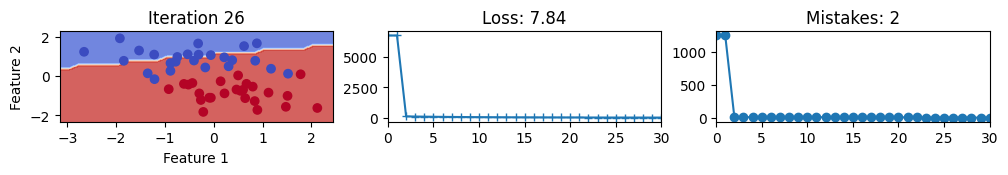

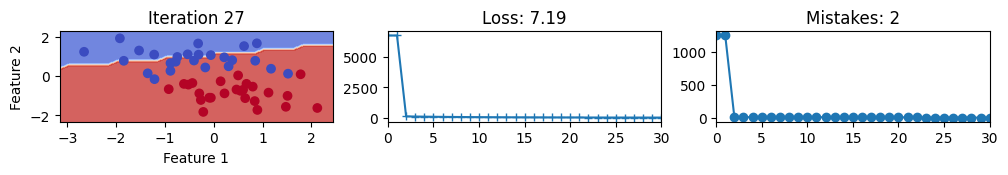

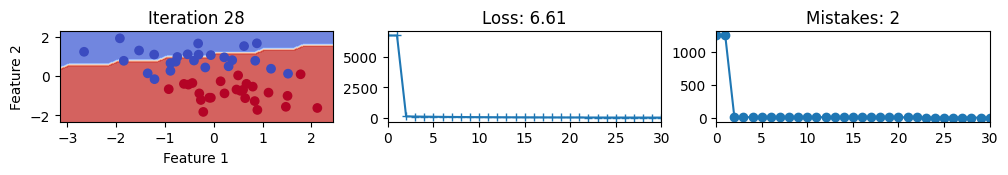

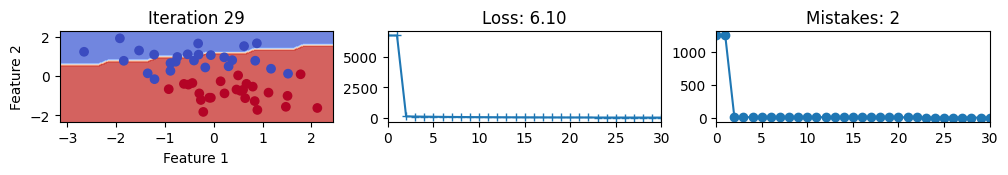

In [ ]:
for iter in range(epochs):
    loss = compute_loss_3542(X_3542, y_3542, w)
    losses.append(loss)

    mistake = computeMistakes_3542(X_3542, y_3542, w)
    mistakes.append(mistake)

    # Compute gradient for the current iteration
    grad = compute_gradient_3542(X_3542, y_3542, w)

    # Update weights using the gradient and learning rate


    # Plot the decision boundary, loss, and mistakes for the current iteration
    fig = plt.figure(figsize=(12, 42))
    ax = fig.add_subplot(epochs, 3, 3 * iter + 1)
    plot_boundary_3542(X_3542, y_3542, w,ax)
    ax.set_title('Iteration %d' % iter)

    ax = fig.add_subplot(epochs, 3, 3 * iter + 2)
    ax.plot(range(len(losses)), losses, '-+')
    ax.set_xlim([0, epochs])
    ax.set_title('Loss: %.2f' % losses[iter])

    ax = fig.add_subplot(epochs, 3, 3 * iter + 3)
    ax.plot(range(len(mistakes)), mistakes, '-o')
    ax.set_xlim(0, epochs)
    ax.set_title('Mistakes: %d' % mistakes[iter])
    w =w-learning_rate * grad
    #plt.close()

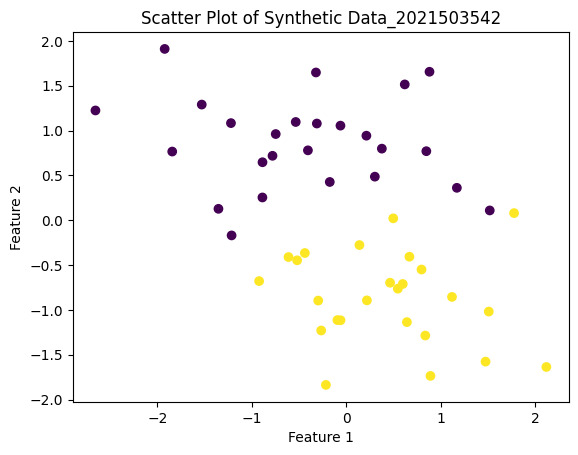

In [ ]:
# Plotting the generated dataset
plt.scatter(X_3542[:, 0], X_3542[:, 1], c=y_3542)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Synthetic Data_2021503542')
plt.show()

In [ ]:
## QN.2 Perceptron learning algorithm with gradient descent to classify AND GATE

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X_3542 = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y_3542 = np.array([0, 0, 0, 1])
y_3542 = y_3542[:, np.newaxis]

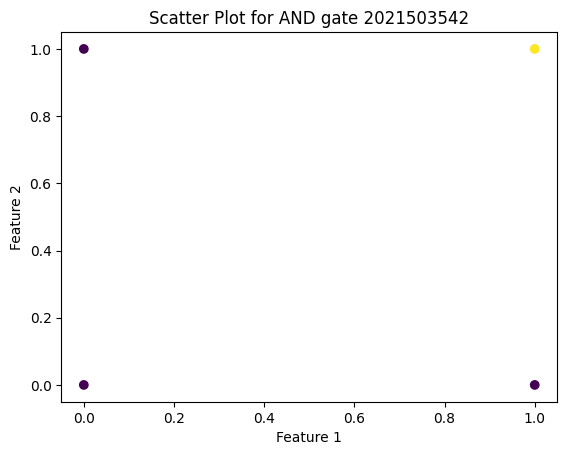

In [ ]:
# Plotting the generated dataset
plt.scatter(X_3542[:, 0], X_3542[:, 1], c=y_3542)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot for AND gate 2021503542')
plt.show()

In [ ]:
def compute_loss_3542(X_3542, y_3542, w):

    x1 = np.hstack((np.ones((X_3542.shape[0], 1)), X_3542))
    #x -> 2 columns corresponding 2 features
    #w -> 3 columns two weights and one bias term
    #So add an extra column with value 1 denoting the bias term

    ypred = np.dot(x1, w)

    # Mean squared error loss
    loss = 0.5*np.sum((y_3542- ypred) ** 2)

    return loss

In [ ]:
def computeMistakes_3542(X, y, w):
    x1 = np.hstack((np.ones([X.shape[0], 1]), X))
    ypred = np.dot(x1, w)
    ypred1 = np.zeros(ypred.shape)
    #This line is crucial, it scans the entire ypred and if it is lesser than 0, it is 0, if it is greater than 1 then 1
    ypred1[ypred < 0.16 ] = 0
    ypred1[ypred >= 0.16  ] = 1
    num_mistakes = len(np.where(ypred1 != y)[0])
    return num_mistakes

In [ ]:
def plot_boundary_3542(X, y, w, ax):
    # Create a meshgrid of points to evaluate the decision boundary
    h = 0.2  # Step size in the mesh
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    # Flatten the meshgrid points and add a column of ones for bias
    x_mesh = np.c_[np.ones(len(x1.ravel())), x1.ravel(), x2.ravel()]

    # Compute the predicted labels for the meshgrid points
    y_pred = np.sign(np.dot(x_mesh, w))
    y_pred = y_pred.reshape(x1.shape)

    # Plot the decision boundary
    ax.contourf(x1, x2, y_pred, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    # Add labels and title
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.set_title('Decision Boundary')


In [ ]:
learning_rate=0.001
w0=np.array([-2,2,0])
print(w0.shape)
w0=w0[:,np.newaxis]
print(w0.shape)
w=w0
losses=[]
mistakes=[]
epochs=30

(3,)
(3, 1)


<ipython-input-47-3d034695031f>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12, 42))


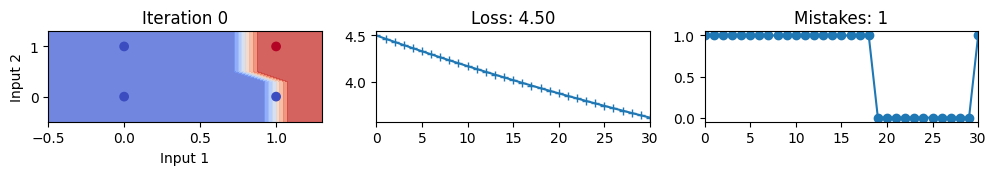

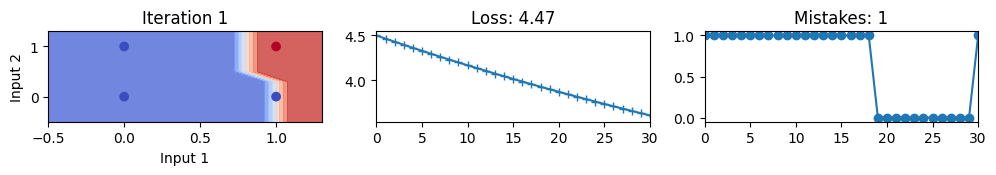

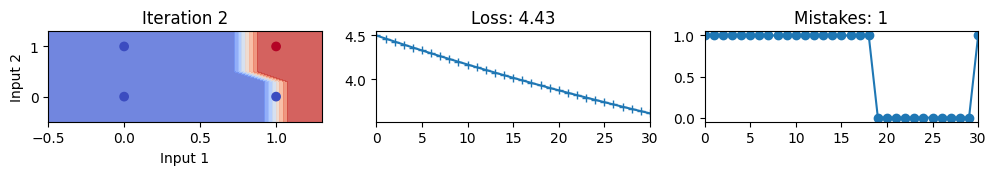

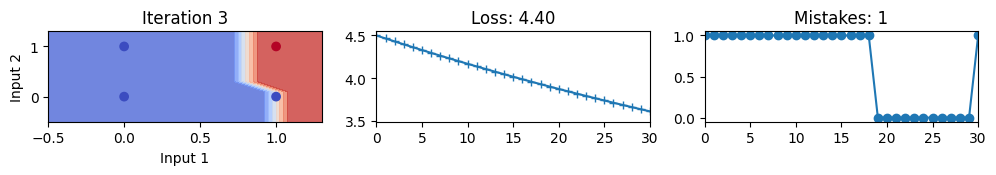

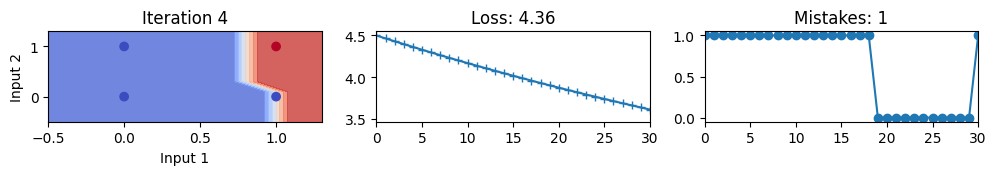

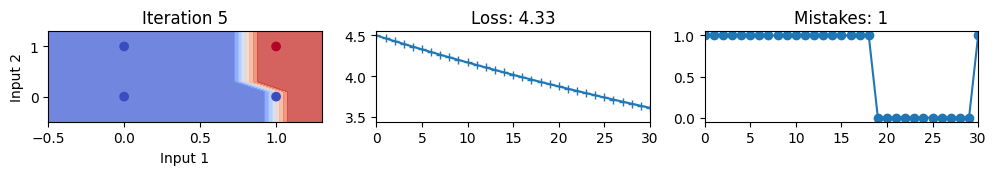

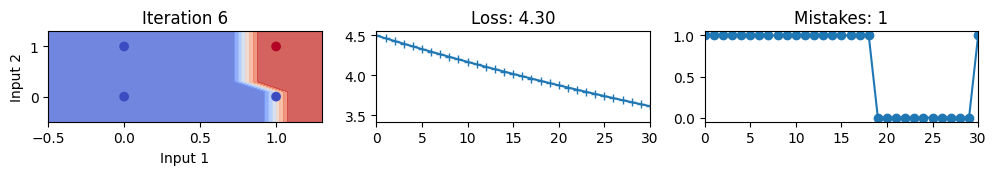

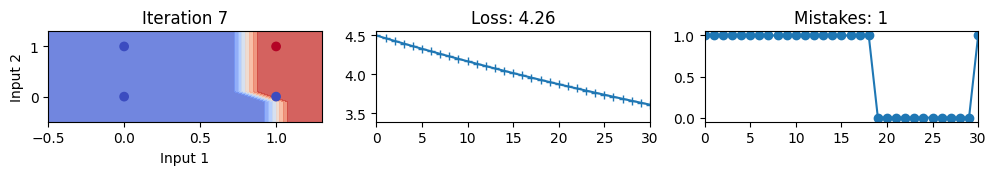

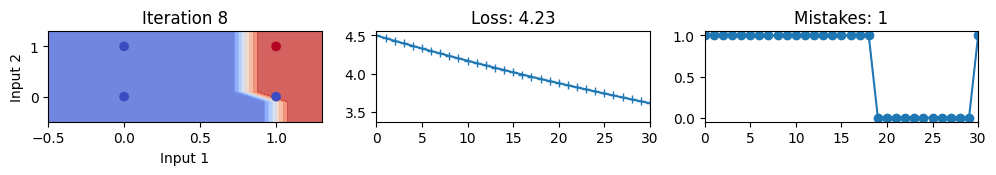

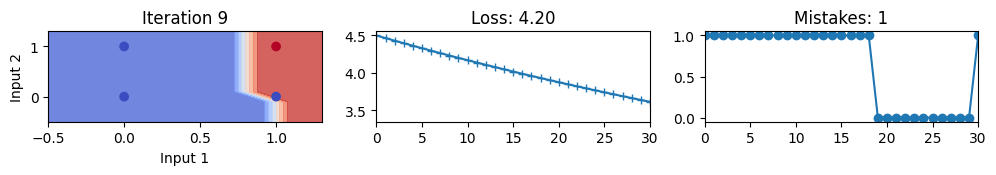

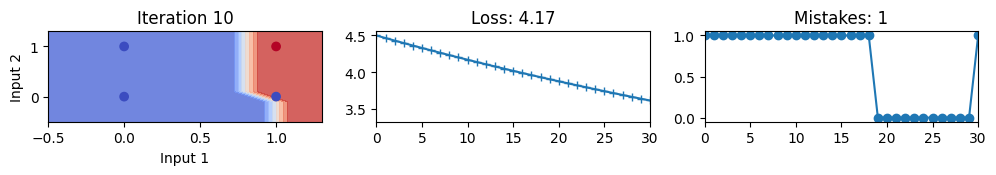

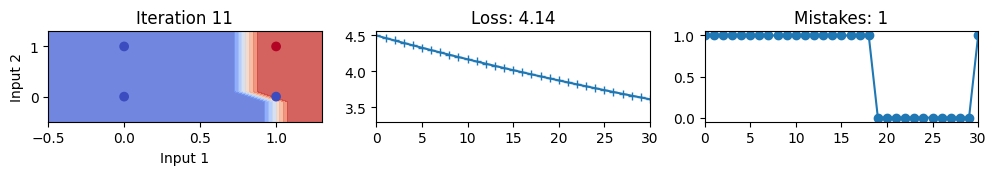

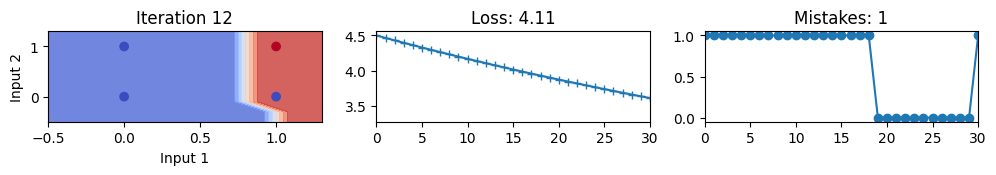

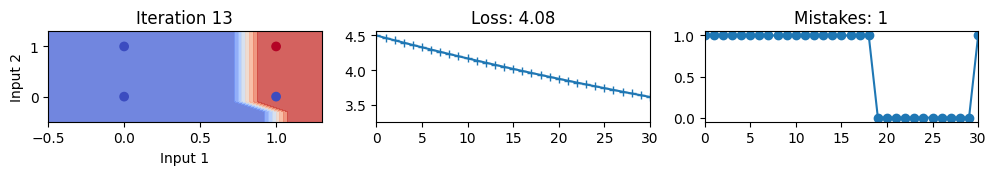

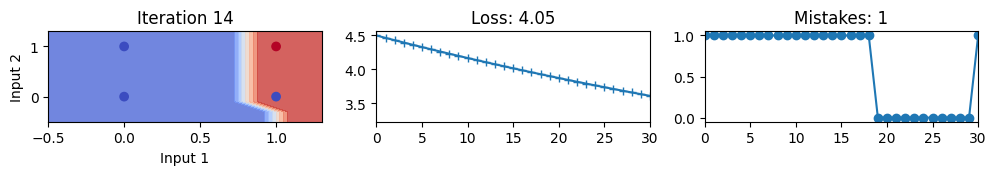

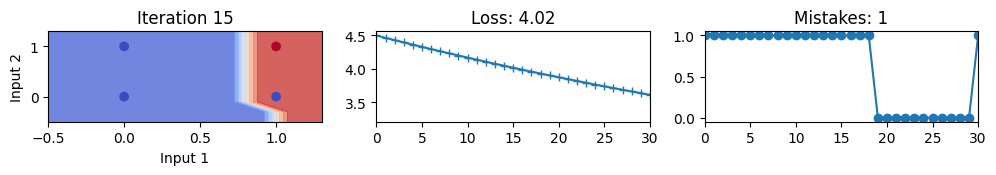

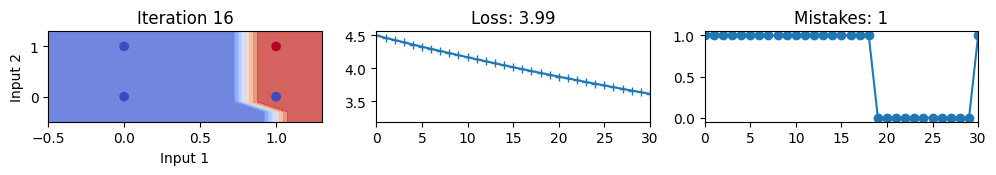

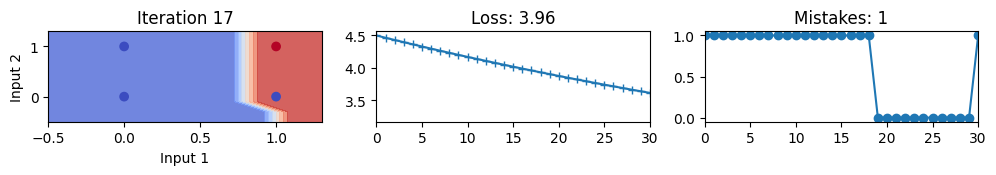

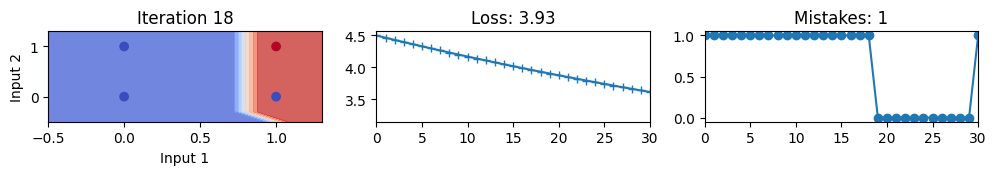

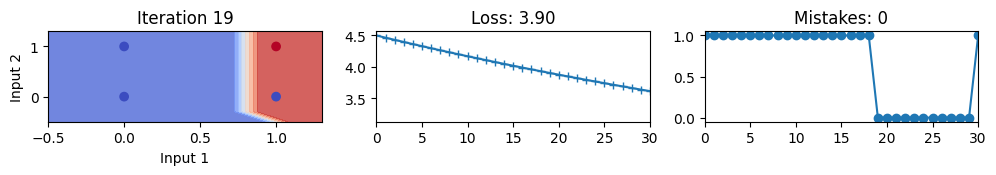

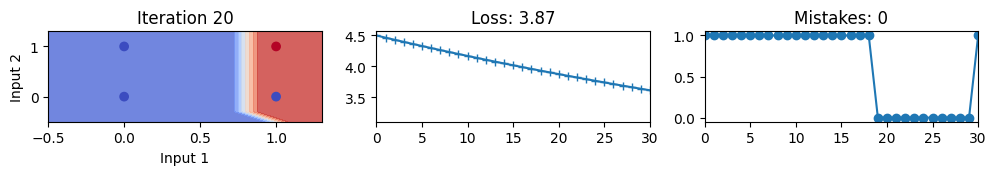

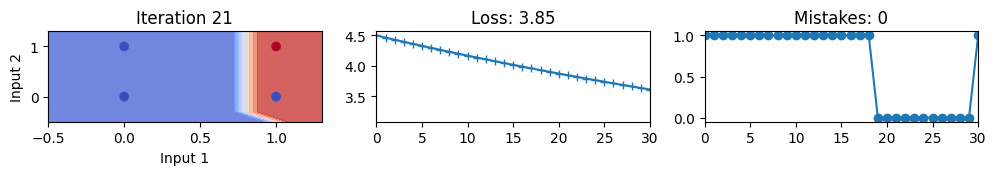

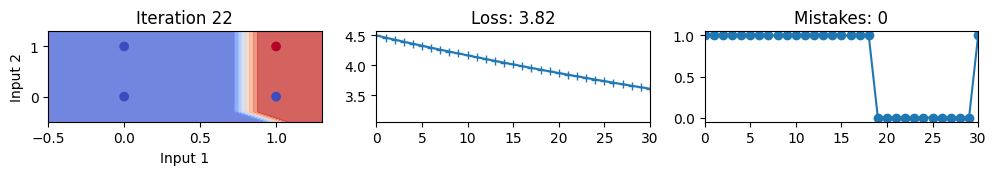

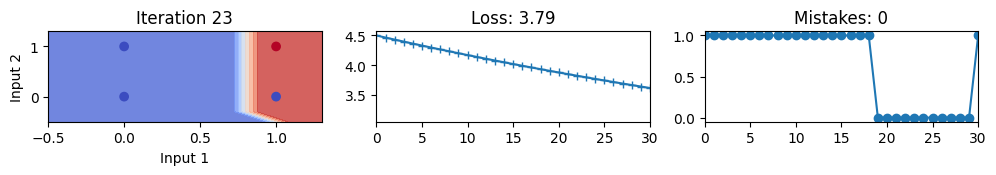

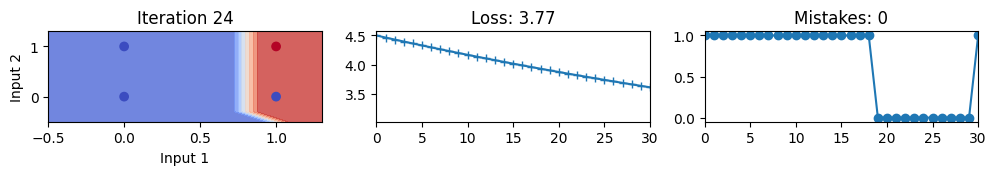

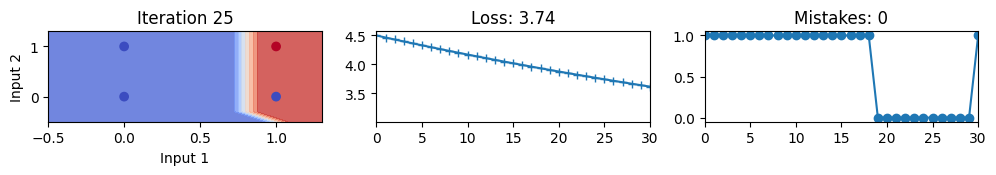

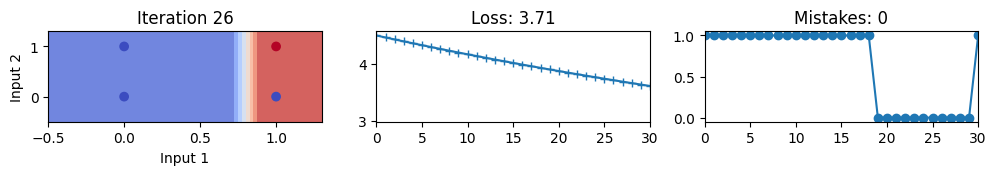

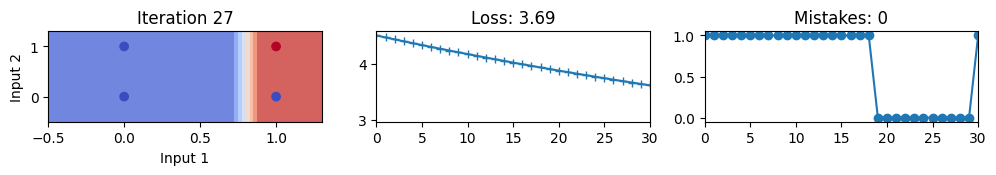

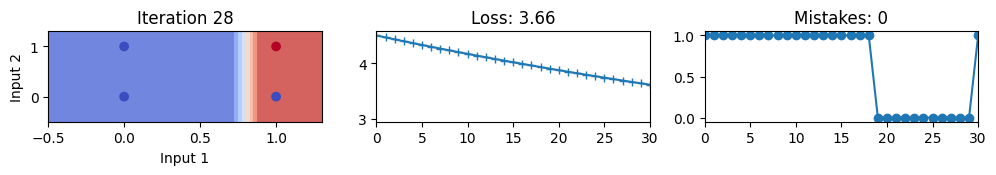

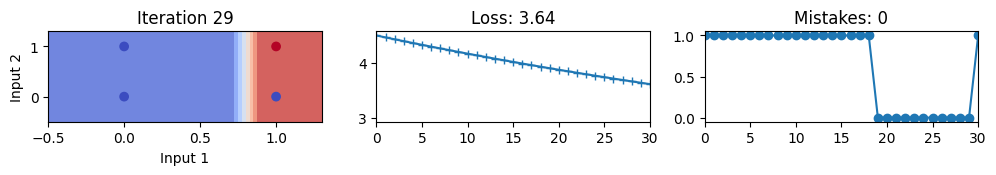

In [ ]:
for iter in range(epochs):
    loss = compute_loss_3542(X_3542, y_3542, w)
    losses.append(loss)

    mistake = computeMistakes_3542(X_3542, y_3542, w)
    mistakes.append(mistake)

    # Compute gradient for the current iteration
    grad = compute_gradient_3542(X_3542, y_3542, w)

    # Update weights using the gradient and learning rate


    # Plot the decision boundary, loss, and mistakes for the current iteration
    fig = plt.figure(figsize=(12, 42))
    ax = fig.add_subplot(epochs, 3, 3 * iter + 1)
    plot_boundary_3542(X_3542, y_3542, w,ax)
    ax.set_title('Iteration %d' % iter)

    ax = fig.add_subplot(epochs, 3, 3 * iter + 2)
    ax.plot(range(len(losses)), losses, '-+')
    ax.set_xlim([0, epochs])
    ax.set_title('Loss: %.2f' % losses[iter])

    ax = fig.add_subplot(epochs, 3, 3 * iter + 3)
    ax.plot(range(len(mistakes)), mistakes, '-o')
    ax.set_xlim(0, epochs)
    ax.set_title('Mistakes: %d' % mistakes[iter])
    w =w-learning_rate * grad
    #plt.close()

In [ ]:
## QN.3 Perceptron learning algorithm with gradient descent to classify XORGATE

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X_3542 = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y_3542 = np.array([0, 1, 1, 0])
y_3542 = y_3542[:, np.newaxis]

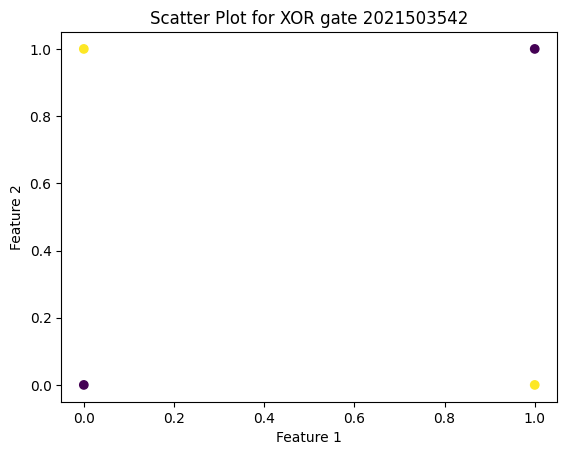

In [ ]:
# Plotting the generated dataset
plt.scatter(X_3542[:, 0], X_3542[:, 1], c=y_3542)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot for XOR gate 2021503542')
plt.show()

In [ ]:
def compute_loss_3542(X_3542, y_3542, w):

    x1 = np.hstack((np.ones((X_3542.shape[0], 1)), X_3542))
    #x -> 2 columns corresponding 2 features
    #w -> 3 columns two weights and one bias term
    #So add an extra column with value 1 denoting the bias term

    ypred = np.dot(x1, w)

    # Mean squared error loss
    loss = 0.5*np.sum((y_3542- ypred) ** 2)

    return loss

In [ ]:
def computeMistakes_3542(X, y, w):
    x1 = np.hstack((np.ones([X.shape[0], 1]), X))
    ypred = np.dot(x1, w)
    ypred1 = np.zeros(ypred.shape)
    #This line is crucial, it scans the entire ypred and if it is lesser than 0, it is 0, if it is greater than 1 then 1
    ypred1[ypred < 1] = 0
    ypred1[ypred >= 1] = 1
    num_mistakes = np.sum(ypred1 != y)
    return num_mistakes

In [ ]:
def compute_gradient_3542(X, y, w):
    x1 = np.hstack([np.ones([X.shape[0], 1]), X])
    y_pred = np.dot(x1, w)
    grad = np.zeros(w.shape)
    for j in range(len(grad)):
        grad[j] = -np.dot((y - y_pred).transpose(), x1[:, j:j+1])
    return grad

In [ ]:
def plot_boundary_3542(X, y, w, ax):
    # Create a meshgrid of points to evaluate the decision boundary
    h = 0.2  # Step size in the mesh
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    # Flatten the meshgrid points and add a column of ones for bias
    x_mesh = np.c_[np.ones(len(x1.ravel())), x1.ravel(), x2.ravel()]

    # Compute the predicted labels for the meshgrid points
    y_pred = np.sign(np.dot(x_mesh, w))
    y_pred = y_pred.reshape(x1.shape)

    # Plot the decision boundary
    ax.contourf(x1, x2, y_pred, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    # Add labels and title
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.set_title('Decision Boundary')


In [ ]:
learning_rate=0.1
w0=np.array([10,10,10])
print(w0.shape)
w0=w0[:,np.newaxis]
print(w0.shape)
w=w0
losses=[]
mistakes=[]
epochs=4

(3,)
(3, 1)


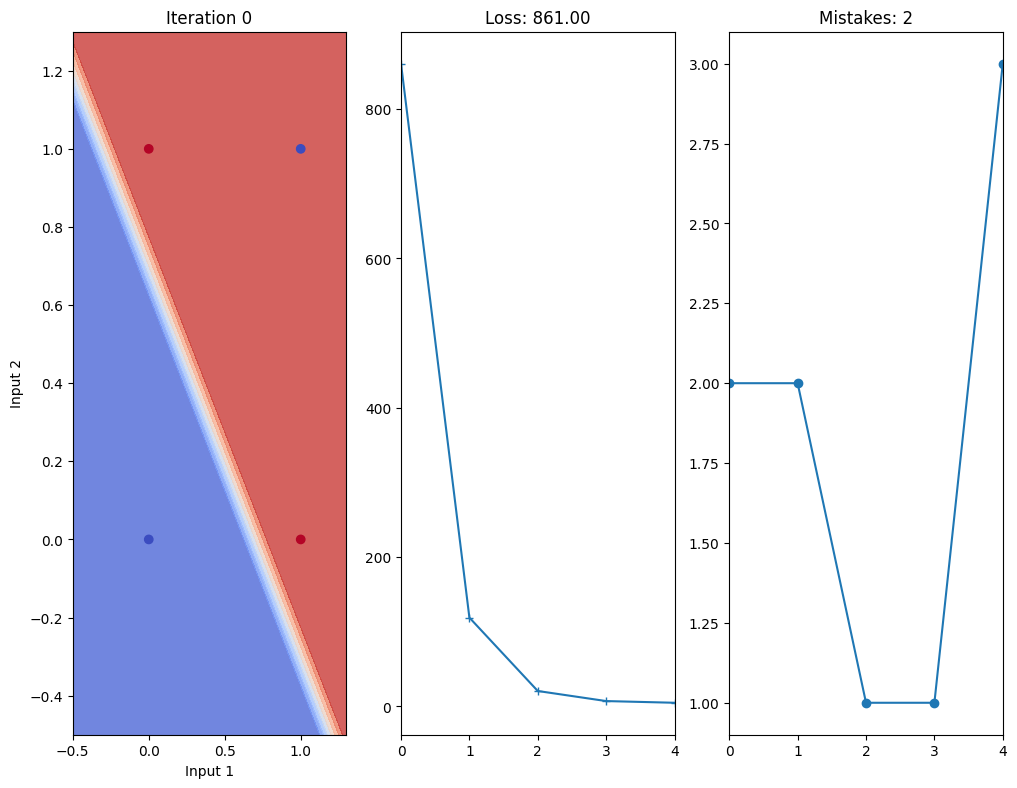

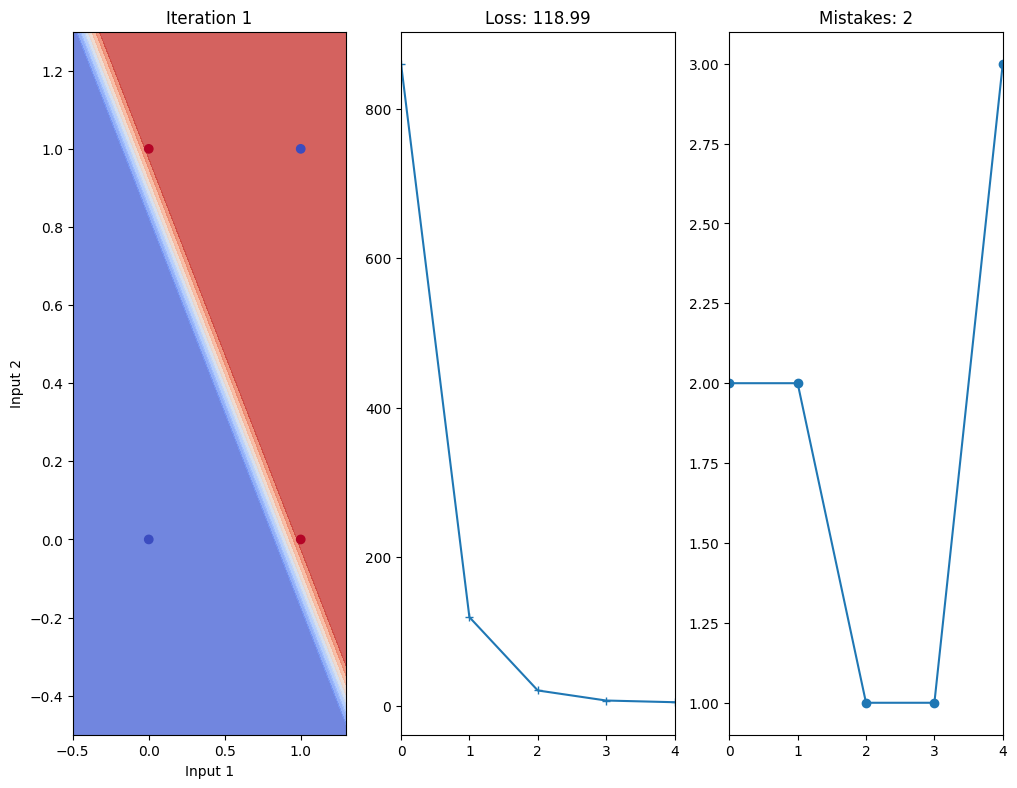

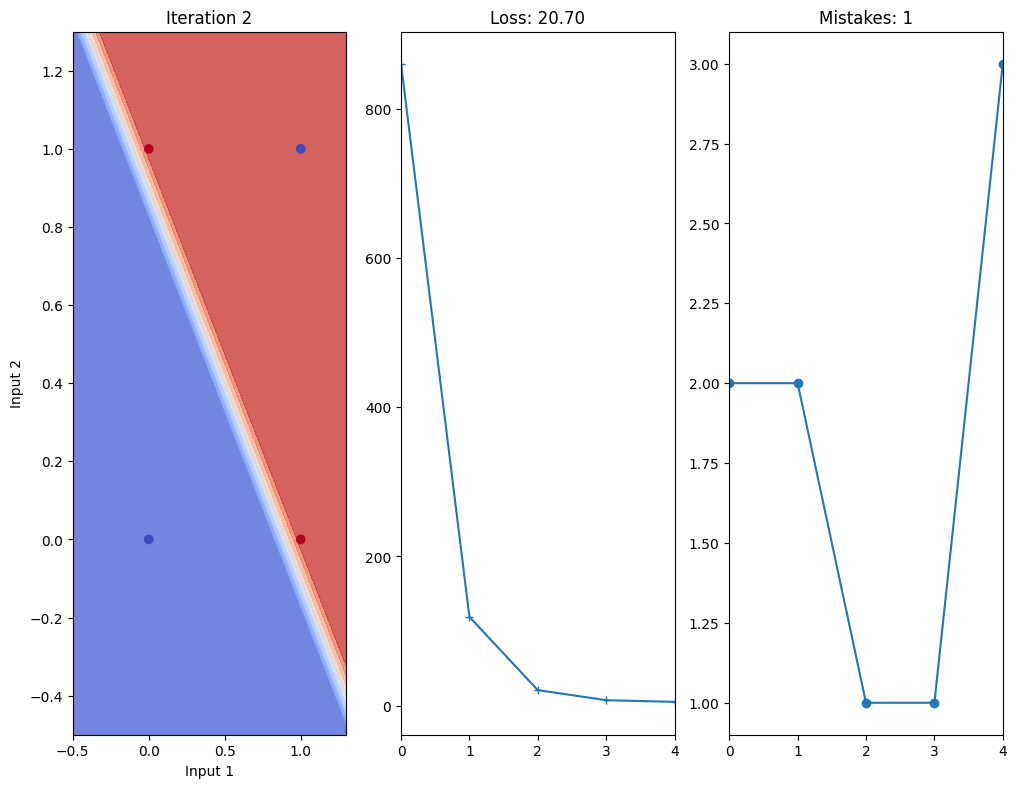

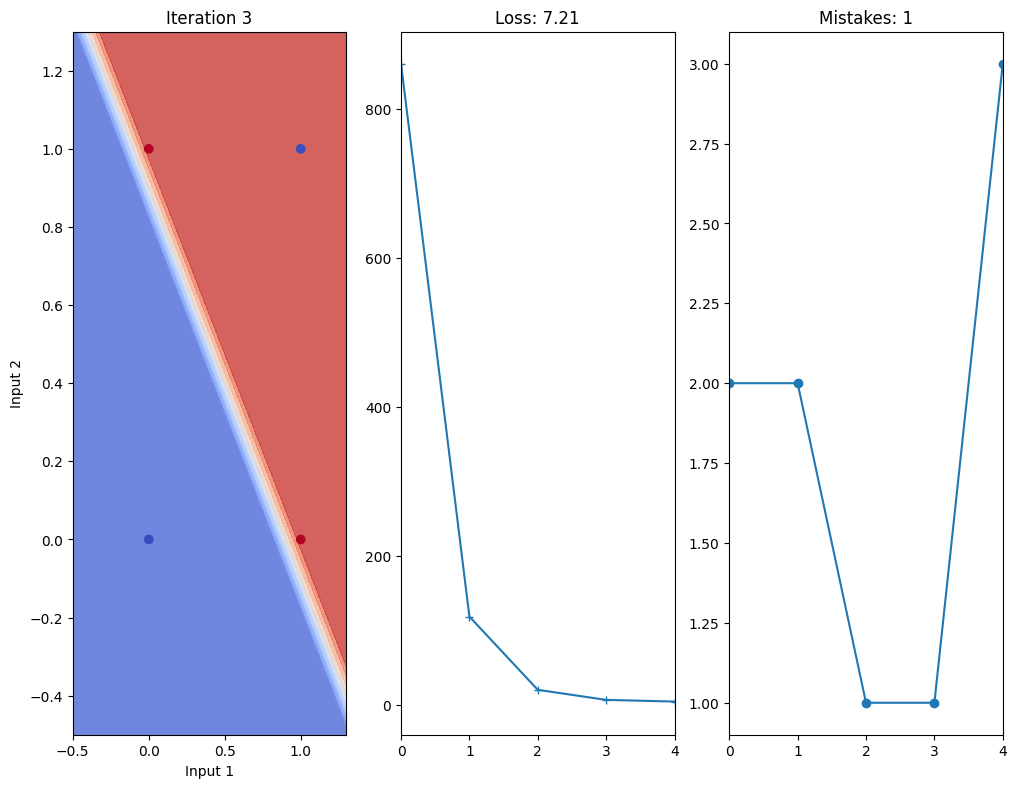

In [ ]:
for iter in range(epochs):
    loss = compute_loss_3542(X_3542, y_3542, w)
    losses.append(loss)

    mistake = computeMistakes_3542(X_3542, y_3542, w)
    mistakes.append(mistake)

    # Compute gradient for the current iteration
    grad = compute_gradient_3542(X_3542, y_3542, w)

    # Update weights using the gradient and learning rate


    # Plot the decision boundary, loss, and mistakes for the current iteration
    fig = plt.figure(figsize=(12, 42))
    ax = fig.add_subplot(epochs, 3, 3 * iter + 1)
    plot_boundary_3542(X_3542, y_3542, w,ax)
    ax.set_title('Iteration %d' % iter)

    ax = fig.add_subplot(epochs, 3, 3 * iter + 2)
    ax.plot(range(len(losses)), losses, '-+')
    ax.set_xlim([0, epochs])
    ax.set_title('Loss: %.2f' % losses[iter])

    ax = fig.add_subplot(epochs, 3, 3 * iter + 3)
    ax.plot(range(len(mistakes)), mistakes, '-o')
    ax.set_xlim(0, epochs)
    ax.set_title('Mistakes: %d' % mistakes[iter])
    w =w-learning_rate * grad
    #plt.close()